## Import

In [1]:
import sys

sys.path.append(r'C:\Users\Marco\Documents\GitHub\GeoSpatial-analysis\facility-location-Bergen\src\facility_location_Bergen\custome_modules')

In [4]:
import json
import pytz
import folium
import geojson
import numpy as np
import pandas as pd
import pymongo as pm
from time import time
import seaborn as sns
import shapely as shp
import geopandas as gpd
from dateutil import parser
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from mongo_db import retrieve_database_and_collections
from convert_geometry import toMultiLineString, toExtremePoints

ModuleNotFoundError: No module named 'basemap'

## Retrieve collection and convert to a dataframe

In [28]:
day = "20_04_2023"
db_name = "facility_location_Bergen"

In [29]:
def from_json_to_gdf(db_name:str, day: str):
    # set the first and last date of the day
    first_date = datetime.strptime(f"{day}T07:30:00.000+02:00", "%d_%m_%YT%H:%M:%S.%f%z")
    last_date = datetime.strptime(f"{day}T17:00:00.000+02:00", "%d_%m_%YT%H:%M:%S.%f%z")
    # retrieve database and collections
    db, collection = retrieve_database_and_collections(db_name, day, ["clean"])
    key_list = list(collection.keys())
    clean_collection = collection[key_list[0]]
    # retrieve data from mongoDB and convert it to a pandas dataframe
    df = pd.json_normalize(clean_collection.find({"api_call_time": {"$gte": first_date, "$lte": last_date}}))
    df.set_index("_id", inplace=True)
    # process dataframe columns
    df['geometry.multi_line'] = df.apply(lambda x: toMultiLineString(x["geometry.geometries"]), axis=1)
    df['geometry.extreme_point'] = df.apply(lambda x: toExtremePoints(x["geometry.multi_line"]), axis=1)
    df['api_call_time'] = df.apply(lambda x: x["api_call_time"].tz_localize('UTC'), axis=1)
    df['sourceUpdated'] = df.apply(lambda x: x["sourceUpdated"].tz_localize('UTC'), axis=1)
    # convert dataframe to geodataframe
    gdf = gpd.GeoDataFrame(df, geometry="geometry.multi_line")
    return gdf

In [30]:
gdf = from_json_to_gdf(db_name, day)

In [31]:
gdf.head()

,sourceUpdated,api_call_time,description,length,currentFlow.speed,currentFlow.speedUncapped,currentFlow.freeFlow,currentFlow.jamFactor,currentFlow.confidence,currentFlow.traversability,geometry.type,geometry.geometries,currentFlow.jamTendency,currentFlow.junctionTraversability,geometry.multi_line,geometry.extreme_point
_id,,,,,,,,,,,,,,,,
64492f00a2e45ae9289e7c89,2023-04-20 12:58:09+00:00,2023-04-20 13:00:00+00:00,Herland,374.0,13.611112,13.611112,16.11111,1.4,0.74,open,GeometryCollection,"[{'type': 'LineString', 'coordinates': [[5.537...",NaN,NaN,"MULTILINESTRING ((5.53747 60.42335, 5.53757 60...","MULTIPOINT (5.53747 60.42335, 5.53903 60.42214)"
64492f00a2e45ae9289e8098,2023-04-20 13:03:09+00:00,2023-04-20 13:05:00+00:00,Herland,374.0,13.055556,13.055556,16.11111,1.7,0.72,open,GeometryCollection,"[{'type': 'LineString', 'coordinates': [[5.537...",NaN,NaN,"MULTILINESTRING ((5.53747 60.42335, 5.53757 60...","MULTIPOINT (5.53747 60.42335, 5.53903 60.42214)"
64492f00a2e45ae9289e827c,2023-04-20 13:08:09+00:00,2023-04-20 13:10:00+00:00,Herland,374.0,13.055556,13.055556,16.11111,1.6,0.72,open,GeometryCollection,"[{'type': 'LineString', 'coordinates': [[5.537...",NaN,NaN,"MULTILINESTRING ((5.53747 60.42335, 5.53757 60...","MULTIPOINT (5.53747 60.42335, 5.53903 60.42214)"
64492f00a2e45ae9289e879e,2023-04-20 13:13:09+00:00,2023-04-20 13:15:00+00:00,Herland,374.0,13.055556,13.055556,16.11111,1.6,0.71,open,GeometryCollection,"[{'type': 'LineString', 'coordinates': [[5.537...",NaN,NaN,"MULTILINESTRING ((5.53747 60.42335, 5.53757 60...","MULTIPOINT (5.53747 60.42335, 5.53903 60.42214)"
64492f00a2e45ae9289e88e8,2023-04-20 13:18:09+00:00,2023-04-20 13:20:00+00:00,Herland,374.0,13.055556,13.055556,16.11111,1.6,0.71,open,GeometryCollection,"[{'type': 'LineString', 'coordinates': [[5.537...",NaN,NaN,"MULTILINESTRING ((5.53747 60.42335, 5.53757 60...","MULTIPOINT (5.53747 60.42335, 5.53903 60.42214)"


In [32]:
gdf.describe()

,length,currentFlow.speed,currentFlow.speedUncapped,currentFlow.freeFlow,currentFlow.jamFactor,currentFlow.confidence,currentFlow.jamTendency
count,38430.000000,38298.000000,38298.000000,38430.000000,38430.000000,38298.000000,41.000000
mean,1095.093443,10.606110,10.650665,12.357013,1.348249,0.868736,-0.609756
std,1349.393435,4.832704,4.925050,4.331328,1.758538,0.101692,0.802435
min,5.000000,0.555556,0.555556,2.777778,0.000000,0.700000,-1.000000
25%,92.000000,7.222222,7.222222,8.888889,0.200000,0.770000,-1.000000
50%,629.000000,9.722222,9.722222,11.388889,0.900000,0.890000,-1.000000
75%,1559.000000,13.333334,13.333334,15.000000,1.800000,0.970000,-1.000000
max,8127.000000,22.777779,31.388890,22.222223,10.000000,0.990000,1.000000


In [33]:
first_morning_date = datetime.strptime(f"{day}T07:30:00.000+02:00", "%d_%m_%YT%H:%M:%S.%f%z")

<Axes: >

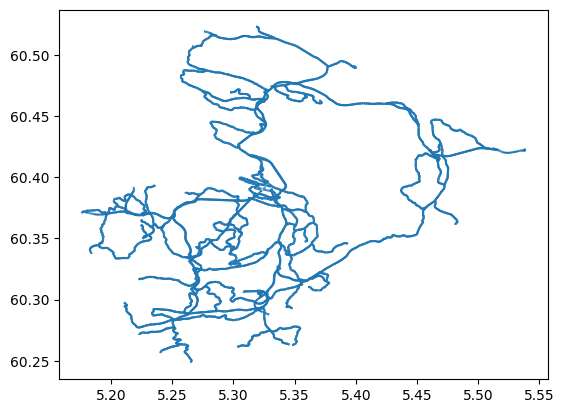

In [34]:
gdf.where(gdf["api_call_time"]==first_morning_date).dropna(how="all").plot()

### Work with morning data

#### Animated

In [35]:
first_date = first_morning_date
last_date = datetime.strptime(f"2023-04-{day[:2]}T09:30:00.000+02:00", "%Y-%m-%dT%H:%M:%S.%f%z")

In [36]:
gdf_sample = gdf.where((gdf["api_call_time"]>=first_date) & (gdf["api_call_time"]<=last_date)).dropna(how="all")

In [37]:
def get_color(jam):
    if jam is np.nan:
        return np.nan
    
    if 0 <= jam <= 3:
        return "green"
    elif 3 < jam <= 7:
        return "orange"
    elif 7 <= jam <= 10:
        return "red"

In [38]:
lats = {}
lons = {}
df_dict = {}
t = time()

for i, date in enumerate(gdf_sample["api_call_time"].unique()):
    df = gdf_sample.where(gdf_sample["api_call_time"]==date).dropna(how="all")
    df_dict[date]=[]
    
    for feature, date, jam in zip(df['geometry.multi_line'], df["api_call_time"], df["currentFlow.jamFactor"]):
        color = get_color(jam)
        linestrings = feature.geoms
        lats = []
        lons = []
        dates = []
        colors = []
        
        for linestring in linestrings:
            x, y = linestring.xy
            lats = np.append(lats, list(x))
            lons = np.append(lons, list(y))
            dates = np.append(dates, [date]*len(x))
            colors = np.append(colors, [color]*len(x))
        
        df_dict[date].append(pd.DataFrame({"lat": lats, "lon": lons, "date": dates, "color": colors}))
        df_dict[date][-1] = pd.concat([df_dict[date][-1], 
                                       pd.DataFrame({"lat": [np.nan], "lon": [np.nan], "date": [np.nan], "color": [np.nan]})],
                                      ignore_index=True)
        
    if i%2==0:
        print(f"Time after {i} iter: {time()-t}")

Time after 0 iter: 1.8915245532989502
Time after 2 iter: 5.959238290786743
Time after 4 iter: 9.84360647201538
Time after 6 iter: 13.87357473373413
Time after 8 iter: 17.2955584526062
Time after 10 iter: 21.388110160827637
Time after 12 iter: 25.33561897277832
Time after 14 iter: 28.756653547286987
Time after 16 iter: 32.677711486816406
Time after 18 iter: 36.40871524810791
Time after 20 iter: 39.9357476234436
Time after 22 iter: 43.6606810092926
Time after 24 iter: 48.00427484512329


In [39]:
df_dict2 = {}

for key in df_dict.keys():
    df_dict2[key] = pd.concat(df_dict[key], ignore_index=True)

In [40]:
df_plot = pd.concat(df_dict2, ignore_index=True)

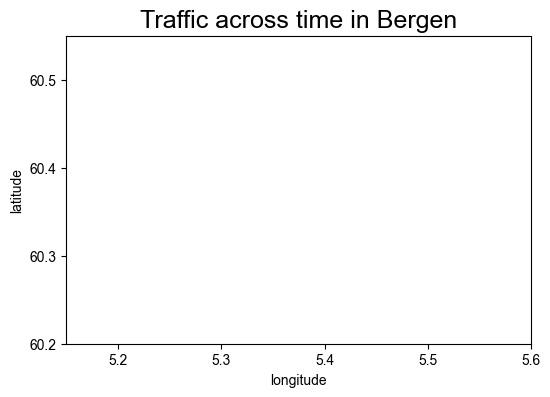

In [41]:
fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111)
# Create figure and add axes
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

# ax1.set_position([0.1,0.1,0.8,0.8])
ax1.set_xlim(5.15, 5.6)
ax1.set_ylim(60.2, 60.55)
ax1.set_title('Traffic across time in Bergen')
ax1.set_xlabel('longitude')
ax1.set_ylabel('latitude')
t = ax1.text(5.4,60.25,'', fontdict={'family': 'serif',
                'color':  'white',
                'weight': 'normal',
                'size': 13,
                })

In [42]:
def animate(i):
    df = df_dict2.get(list(df_dict2.keys())[i])
    ts = time()
    
    ax1.plot('lat', 'lon', data=df.where(df.color=="green"), c="green")
    ax1.plot('lat', 'lon', data=df.where(df.color=="orange"), c="orange")
    ax1.plot('lat', 'lon', data=df.where(df.color=="red"), c="red")
    
    t.set_text(str(pd.Timestamp.tz_convert(list(df_dict2.keys())[i], pytz.timezone("Europe/Oslo")))[:16])
    print(f"Time for plotting {list(df_dict2.keys())[i]}: {time()-ts}")

In [43]:
ani = FuncAnimation(fig=fig, 
                    func=animate, 
                    frames=len(df_dict2), 
                    interval=1000, 
                    repeat_delay=False,
                    cache_frame_data=False)

ani.save(r'C:\Users\Marco\Documents\GitHub\GeoSpatial-analysis\facility-location-Bergen\data\08_reporting\AnimatedPlot2004203morning.gif', 
         dpi=200)

MovieWriter ffmpeg unavailable; using Pillow instead.


Time for plotting 2023-04-20 05:30:00+00:00: 0.4039952754974365
Time for plotting 2023-04-20 05:30:00+00:00: 0.21398472785949707
Time for plotting 2023-04-20 05:35:00+00:00: 0.12299728393554688
Time for plotting 2023-04-20 05:40:00+00:00: 0.11400508880615234
Time for plotting 2023-04-20 05:45:00+00:00: 0.1110391616821289
Time for plotting 2023-04-20 05:50:00+00:00: 0.08799910545349121
Time for plotting 2023-04-20 05:55:00+00:00: 0.07700061798095703
Time for plotting 2023-04-20 06:00:00+00:00: 0.06699657440185547
Time for plotting 2023-04-20 06:05:00+00:00: 0.06896495819091797
Time for plotting 2023-04-20 06:10:00+00:00: 0.06601238250732422
Time for plotting 2023-04-20 06:15:00+00:00: 0.05099749565124512
Time for plotting 2023-04-20 06:20:00+00:00: 0.04799985885620117
Time for plotting 2023-04-20 06:25:00+00:00: 0.04800128936767578
Time for plotting 2023-04-20 06:30:00+00:00: 0.04800057411193848
Time for plotting 2023-04-20 06:35:00+00:00: 0.04996180534362793
Time for plotting 2023-04-2

#### Folium

In [232]:
ps = []
gdf_first_date = gdf.where(gdf["api_call_time"]==first_morning_date).dropna(how="all")

for i in range(len(gdf_first_date)):
    ps_aux = []
    for p in gdf_first_date['geometry.multi_line'].iloc[i].geoms:
        ps_aux.append([p.coords.xy[1][0], p.coords.xy[0][0]])

    ps.append(ps_aux)

In [233]:
map_ = folium.Map(location=[60.397076, 5.324383], tiles="OpenStreetMap", zoom_start=10)
for point in range(len(ps)+1):
    folium.PolyLine(ps[point-1], color='blue', weight=1).add_to(map_)

In [234]:
map_